In [80]:
import matplotlib.pyplot as plt
import numpy as np
import emcee
import scipy.stats
from scipy.stats import bernoulli

thisfigsize = (6,6)

### Exercise 39

In [81]:
# Referred from Example 21
# Function registeration

# Generate ising model
def ising_model(L):
    return bernoulli.rvs(0.5,size=(L,L))*2-1

def whether_flip(A,i,j,beta):
    # beta = 1/(k_B * T) where k_B is the Boltzmann constant and T the temperature
    L = len(A)
    around = A[(i+1)%L,j]+A[(i-1)%L,j]+A[i,(j+1)%L]+A[i,(j-1)%L]
    pp = np.exp(beta*around)/(np.exp(beta*around)+np.exp(-beta*around))
    if np.random.random() < pp:
        A[i,j] = 1
    else:
        A[i,j] = -1
    return A

# Select i_t randomly
def random_flip(L,beta,iter=10**5):
    his = np.zeros(iter)
    A = ising_model(L)
    position = np.random.randint(0,L,(2,iter))
    for i in range(iter):
        A = whether_flip(A,position[0,i],position[1,i],beta)
        his[i] = np.sum(A)
    return his

# Sweep through the lattice deterministically
def ordered_flip(L,beta,iter=10**5):
    his = np.zeros(iter)
    A = ising_model(L)
    for i in range(iter):
        A = whether_flip(A,i%L,i%(L*L)//L,beta)
        his[i] = np.sum(A)
    return his

### Histogram of Magnetization

Text(0, 0.5, 'Frequency')

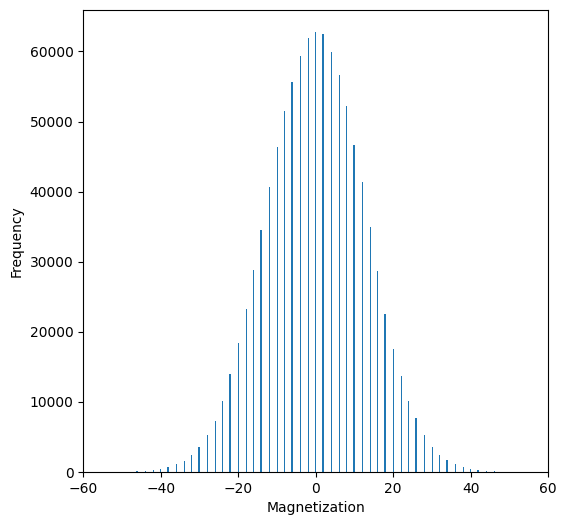

In [82]:
L = 10
beta = 0.1
runiter = 10**6
his = ordered_flip(L,beta,runiter)
plt.figure(figsize=thisfigsize)
plt.hist(his, bins = 'auto')
plt.xlabel('Magnetization')
plt.xlim((-60,60))
plt.ylabel('Frequency')

### Integrated Correlation Time w.r.t. Lattice Size

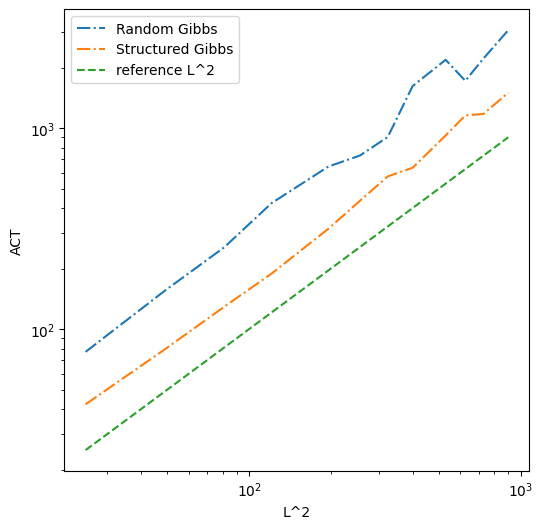

In [83]:
betalst = [0.1]
latticelst = np.linspace(5,30,12,dtype=int)
runiter = 10**6
histmat1 = np.zeros((len(betalst),len(latticelst)))
histmat2 = np.zeros((len(betalst),len(latticelst)))

for i in range(len(betalst)):
    for j in range(len(latticelst)):
        hh1 = random_flip(latticelst[j],betalst[i],runiter)
        hh2 = ordered_flip(latticelst[j],betalst[i],runiter)
        histmat1[i,j] = emcee.autocorr.integrated_time(hh1,quiet=True)
        histmat2[i,j] = emcee.autocorr.integrated_time(hh2,quiet=True)

a1 = histmat1[0]
a2 = histmat2[0]

plt.figure(figsize=thisfigsize)
plt.plot(np.array(latticelst)**2,a1,'-.',label="Random Gibbs")
plt.plot(np.array(latticelst)**2,a2,'-.',label="Structured Gibbs")
plt.plot(np.array(latticelst)**2,np.array(latticelst)**2,'--',label="reference L^2")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('L^2')
plt.ylabel('ACT')
plt.show()

### Integrated correlation time w.r.t. Temperature

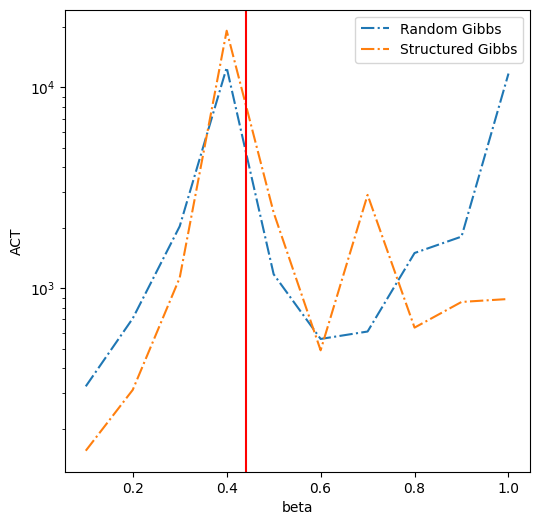

In [84]:
betalst = np.linspace(0.1,1,10)
latticelst = [10]
runiter = 10**6
histmat3 = np.zeros((len(betalst),len(latticelst)))
histmat4 = np.zeros((len(betalst),len(latticelst)))

for i in range(len(betalst)):
    for j in range(len(latticelst)):
        hh1 = random_flip(latticelst[j],betalst[i],runiter)
        hh2 = ordered_flip(latticelst[j],betalst[i],runiter)
        histmat3[i,j] = emcee.autocorr.integrated_time(hh1,quiet=True)
        histmat4[i,j] = emcee.autocorr.integrated_time(hh2,quiet=True)

a1 = histmat3
a2 = histmat4

plt.figure(figsize=thisfigsize)
plt.plot(np.array(betalst),a1,'-.',label = "Random Gibbs")
plt.plot(np.array(betalst),a2,'-.',label = "Structured Gibbs")
plt.axvline(x=0.441,color='r')
plt.legend()
plt.yscale('log')
plt.xlabel('beta')
plt.ylabel('ACT')
plt.show()

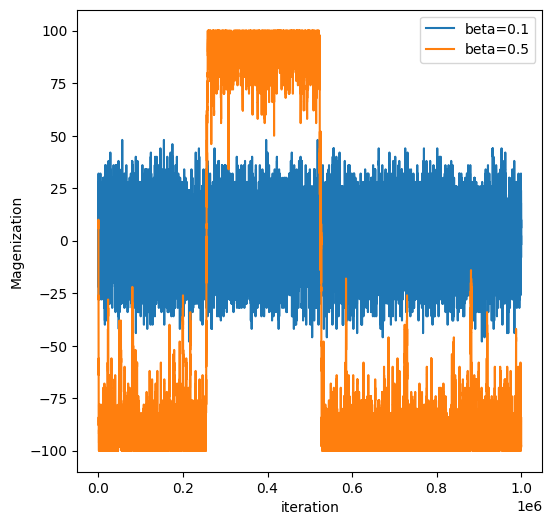

In [85]:
beta1 = 0.1
beta2 = 0.5
bin = [i for i in range(runiter)]
hist1 = ordered_flip(10,beta1,runiter)
hist2 = ordered_flip(10,beta2,runiter)

plt.figure(figsize=thisfigsize)
plt.plot(bin,hist1,label=f'beta={beta1}')
plt.plot(bin,hist2,label=f'beta={beta2}')
plt.xlabel('iteration')
plt.ylabel('Magenization')
plt.legend()
plt.show()

### Exercise 42

In [86]:
def first_flip(A,i,j,beta):
    L = len(A)
    around = A[(i+1)%L,j]+A[(i-1)%L,j]+A[i,(j+1)%L]+A[i,(j-1)%L]
    pp = np.min([1,np.exp(-2*beta*A[i,j]*around)])
    if np.random.random() < pp:
        A[i,j] *= -1
    return A

# Metropolis based scheme to sample the 2d-Ising model
def met_flip(L,beta,iter=10**5):
    his = np.zeros(iter)
    A = ising_model(L)
    pos = np.random.randint(0,L,(2,iter))
    for i in range(iter):
        A = first_flip(A,pos[0,i],pos[1,i],beta)
        his[i] = np.sum(A)
    return his

### Compare across different beta

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20000;
tau: [104515.65618067]


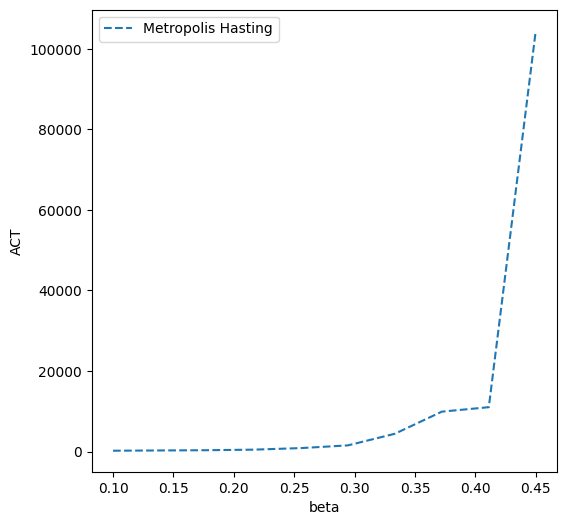

In [87]:
betalst = np.linspace(0.1,0.45,10)
latticelst = [10]
runiter = 10**6
histmat = np.zeros((len(betalst), len(latticelst)))
for i in range(len(betalst)):
  for j in range(len(latticelst)):
    history = met_flip(latticelst[j],betalst[i],runiter)
    histmat[i,j] = emcee.autocorr.integrated_time(history, quiet=True)

plt.figure(figsize=thisfigsize)
plt.plot(betalst,histmat,'--',label='Metropolis Hasting')
plt.xlabel('beta')
plt.ylabel('ACT')
plt.legend()
plt.show()

### Compare across different lattice size

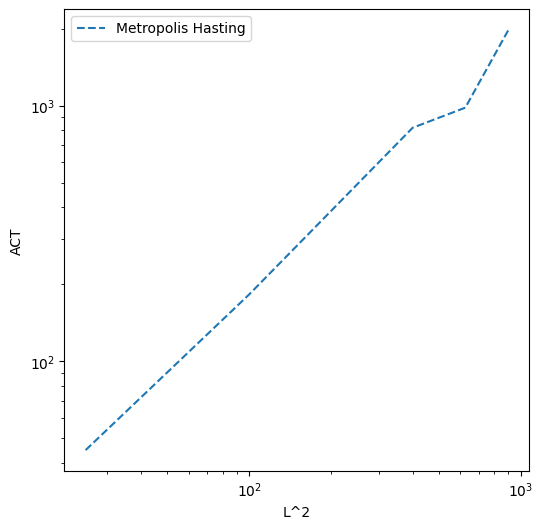

In [88]:
betalst = [0.1]
latticelst = np.linspace(5,30,6,dtype=int)
runiter = 10**6
histmat = np.zeros((len(betalst), len(latticelst)))
for i in range(len(betalst)):
  for j in range(len(latticelst)):
    history = met_flip(latticelst[j],betalst[i],runiter)
    histmat[i,j] = emcee.autocorr.integrated_time(history, quiet=True)

jj = histmat[0]

plt.figure(figsize=thisfigsize)
plt.plot(np.array(latticelst)**2,jj,'--',label='Metropolis Hasting')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('L^2')
plt.ylabel('ACT')
plt.legend()
plt.show()

### Exercise 43

In [89]:
import tqdm

def first_flip(A,i,j,beta):
    L = len(A)
    around = A[(i+1)%L,j]+A[(i-1)%L,j]+A[i,(j+1)%L]+A[i,(j-1)%L]
    pp = np.min([1,np.exp(-2*beta*A[i,j]*around)])
    if np.random.random() < pp:
        A[i,j] *= -1
    return A

def density_function(A,beta):
    cnt = 0
    L = len(A)
    for i in range(L):
        for j in range(L):
            cnt += (A[(i+1)%L,j]+A[(i-1)%L,j]+A[i,(j+1)%L]+A[i,(j-1)%L])*A[i,j]
    return np.exp(cnt*beta/2)

def system_resample(weight):
    N = len(weight)
    uu = (np.random.random()+np.arange(N))/N
    indexes = np.zeros(N,'i')
    cumu_sim = np.cumsum(weight)
    i = 0
    j = 0
    while i < N:
        if uu[i] < cumu_sim[j]:
            indexes[i] = j
            i += 1
        else:
            j += 1
    return indexes

def mc_func(L,beta,N,M,resample=False):
    generate_e = [ising_model(L) for i in range(M)]
    weight = np.ones(M)/M
    for k in range(N):
        for iii in range(M):
            for j in range(L*L):
                generate_e[iii] = first_flip(generate_e[iii],np.random.randint(0,L),np.random.randint(0,L),beta*k/N)
            weight[iii] *= density_function(generate_e[iii],beta/N)
        weight /= np.sum(weight) 
        if resample == True:
            indexes = system_resample(weight)
            new_e = [generate_e[i] for i in indexes]
            generate_e = new_e
            weight = np.ones(M)/M
    mag = [np.sum(A) for A in generate_e]
    return np.dot(weight,mag)

### Experiment without resampling

100%|██████████| 15/15 [02:03<00:00,  8.22s/it]


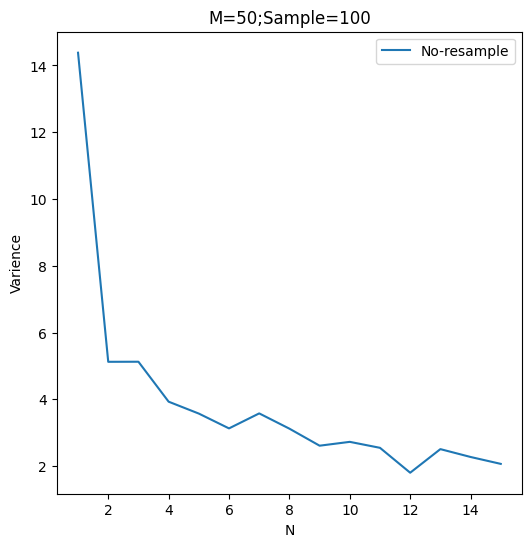

In [103]:
# M = 100, sample = 500
L = 5
beta = 0.2
Nlst = np.linspace(1,15,15,dtype=int)
M = 50
sample = 100

vv = []
for N in tqdm.tqdm(Nlst):
    data = [mc_func(L,beta,N,M,resample=False) for i in range(sample)]
    vv.append(np.var(data))

plt.figure(figsize=thisfigsize)
plt.plot(Nlst,vv,label="No-resample")
plt.title(f'M={M};Sample={sample}')
plt.xlabel('N')
plt.ylabel('Varience')
plt.legend()
plt.show()

### Experiment with resampling

100%|██████████| 15/15 [04:36<00:00, 18.42s/it]


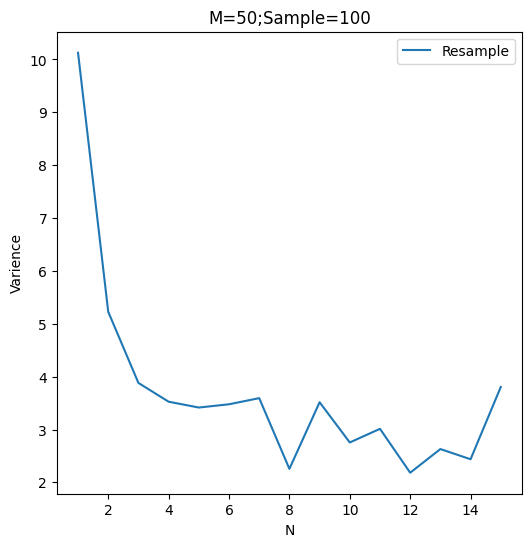

In [104]:
vv2 = []
for N in tqdm.tqdm(Nlst):
    data = [mc_func(L,beta,N,M,resample=True) for i in range(sample)]
    vv2.append(np.var(data))

plt.figure(figsize=thisfigsize)
plt.plot(Nlst,vv2,label="Resample")
plt.title(f'M={M};Sample={sample}')
plt.xlabel('N')
plt.ylabel('Varience')
plt.legend()
plt.show()